## Notebook Purpose: Evaluate Uncertainty in velocity and Lag Dh/Dt for the six study glaciers

In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'


In [2]:
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
from imview import pltlib
import pandas as pd
from pygeotools.lib import warplib,geolib,iolib,malib,filtlib,timelib
import os,sys,glob,shutil
from velocity_proc import glac_dyn, constants, velocity_filter, velocity_timeseries
from demcoreg import dem_mask

In [3]:
%matplotlib inline

In [4]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data


## Imja Lhotse Shar

In [7]:
lag_DhDt = 'ImjaLhotseShar/SMB_data/imja_farinotti_2015-10-02_to_2016-10-29_lag_smb_products/imja_farinotti_2015-10-02_to_2016-10-29_lagrangian_dhdt.tif'
vx_fn = 'ImjaLhotseShar/SMB_data/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_1.tif'
vy_fn = 'ImjaLhotseShar/SMB_data/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_1.tif'
lag_ds = iolib.fn_getds(lag_DhDt)
lag_ma = iolib.ds_getma(lag_ds)
vx_ds,vy_ds = [iolib.fn_getds(fn) for fn in [vx_fn,vy_fn]]
vx_ma,vy_ma = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
ice_mask_lag = dem_mask.get_icemask(lag_ds)
ice_mask_vel = dem_mask.get_icemask(vx_ds)

Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs


In [8]:
lagdhdt_error = np.ma.array(lag_ma,mask=~ice_mask_lag)
vx_error = np.ma.array(vx_ma,mask=~ice_mask_vel)
vy_error = np.ma.array(vy_ma,mask=~ice_mask_vel)

In [9]:
malib.get_stats_dict(lagdhdt_error)

{'count': 4689174,
 'min': -140.41883850097656,
 'max': 177.01856994628906,
 'ptp': 317.4374084472656,
 'mean': -0.22356879339146427,
 'std': 4.021340924845757,
 'nmad': 0.6897753425002098,
 'med': -0.023148879408836365,
 'median': -0.023148879408836365,
 'p16': -1.1079689264297485,
 'p84': 0.7412180304527283,
 'spread': 0.9245934784412384,
 'mode': 0.03858146443963051}

In [10]:
malib.get_stats_dict(vx_error)

{'count': 5367631,
 'min': -58.68559646606445,
 'max': 53.635032653808594,
 'ptp': 112.32063293457031,
 'mean': -0.3855564139705643,
 'std': 2.839560750950681,
 'nmad': 0.7238517273187637,
 'med': -0.131782665848732,
 'median': -0.131782665848732,
 'p16': -0.8028290510177613,
 'p84': 0.5103516817092897,
 'spread': 0.6565903663635255,
 'mode': -0.5670943260192871}

In [11]:
malib.get_stats_dict(vy_error)

{'count': 5367076,
 'min': -61.888118743896484,
 'max': 48.048946380615234,
 'ptp': 109.93706512451172,
 'mean': -0.3074972227759154,
 'std': 3.261118124024914,
 'nmad': 0.615071539413929,
 'med': -0.2527548223733902,
 'median': -0.2527548223733902,
 'p16': -0.7285597324371338,
 'p84': 0.5799102187156677,
 'spread': 0.6542349755764008,
 'mode': 0.6300998330116272}

In [12]:
malib.get_stats_dict(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=~ice_mask_vel))

{'count': 5367076,
 'min': 0.000708162086084485,
 'max': 81.89539337158203,
 'ptp': 81.89468383789062,
 'mean': 1.4795928281593316,
 'std': 4.0930247754056905,
 'nmad': 0.3840255273878574,
 'med': 0.7375175058841705,
 'median': 0.7375175058841705,
 'p16': 0.4179063141345978,
 'p84': 1.3268035650253296,
 'spread': 0.4544486254453659,
 'mode': 19.939062118530273}

<Axes: >

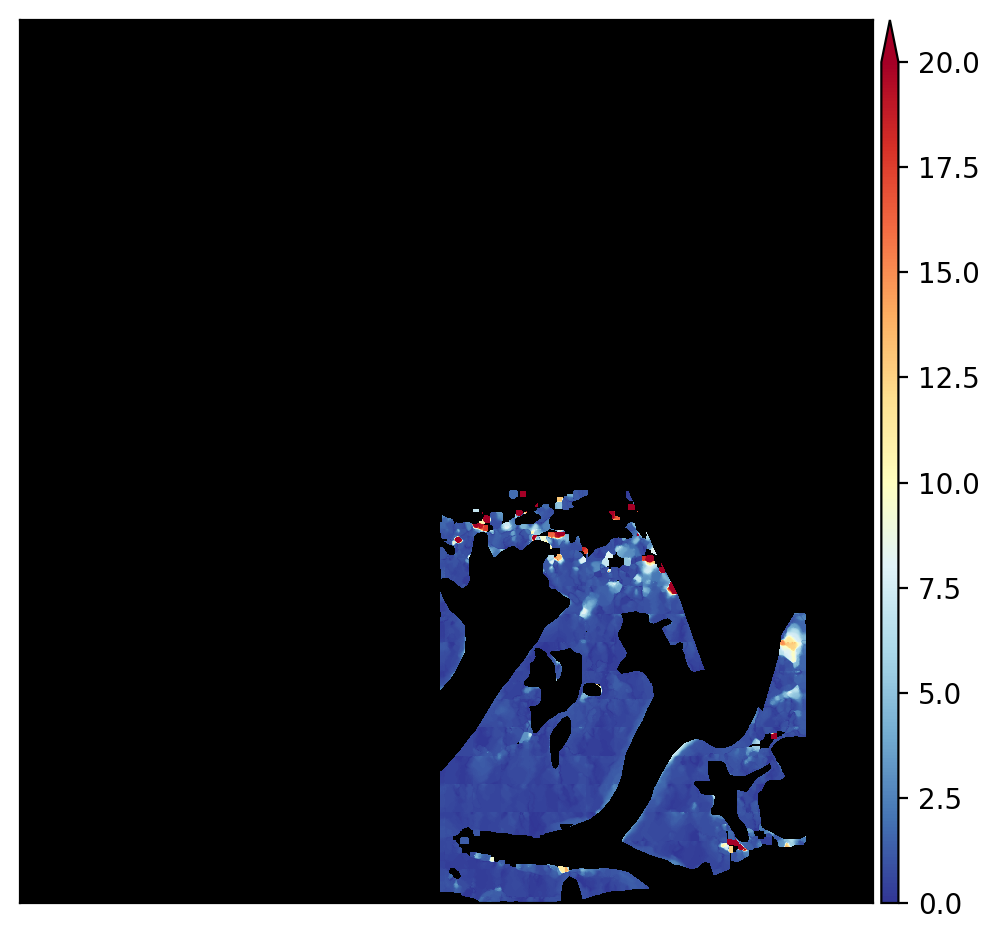

In [13]:
f,ax = plt.subplots()
pltlib.iv(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=~ice_mask_vel),ax=ax,cmap='RdYlBu_r',clim=(0,20))

<Axes: >

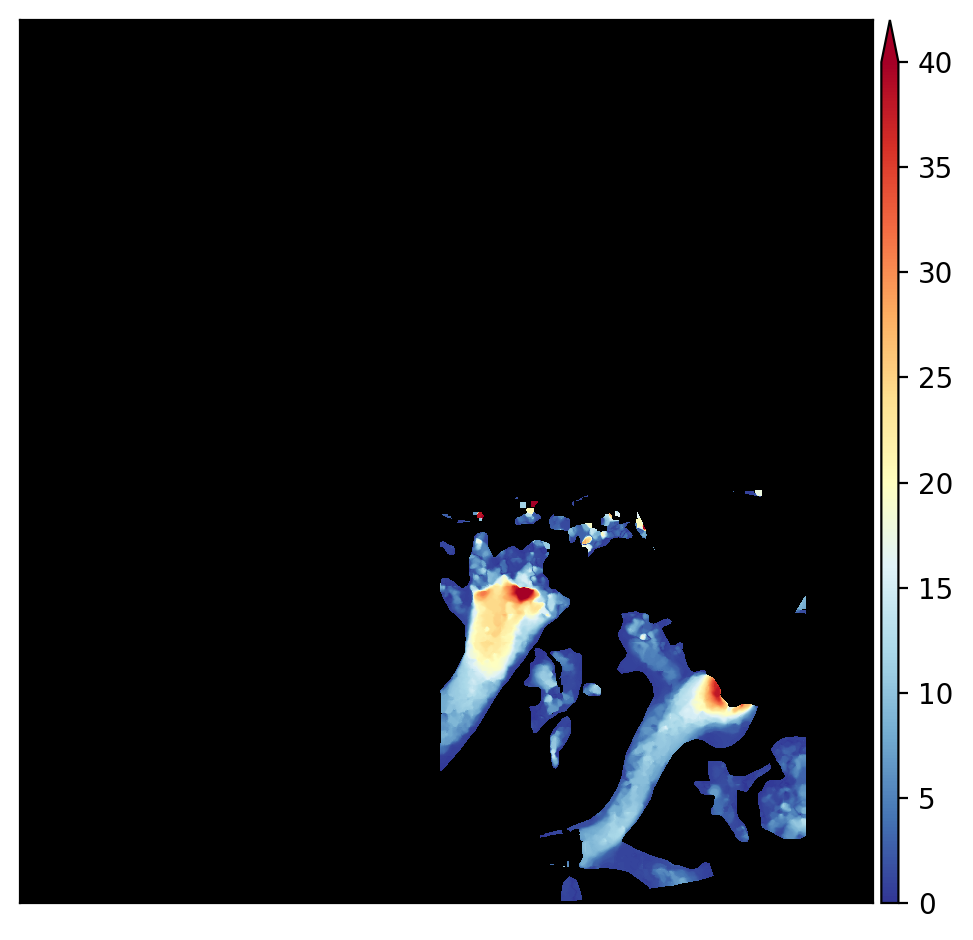

In [14]:
f,ax = plt.subplots()
pltlib.iv(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=ice_mask_vel),ax=ax,cmap='RdYlBu_r',clim=(0,40))

## Khumbu 

In [15]:
lag_DhDt = 'Khumbu/SMB_data/khumbu_farinotti_2015-11-02_to_2016-10-25_lagrangian_dhdt.tif'
vx_fn = 'Khumbu/SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif'
vy_fn = 'Khumbu/SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif'
lag_ds = iolib.fn_getds(lag_DhDt)
lag_ma = iolib.ds_getma(lag_ds)
vx_ds,vy_ds = [iolib.fn_getds(fn) for fn in [vx_fn,vy_fn]]
vx_ma,vy_ma = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
ice_mask_lag = dem_mask.get_icemask(lag_ds)
ice_mask_vel = dem_mask.get_icemask(vx_ds)

Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs


In [16]:
lagdhdt_error = np.ma.array(lag_ma,mask=~ice_mask_lag)
vx_error = np.ma.array(vx_ma,mask=~ice_mask_vel)
vy_error = np.ma.array(vy_ma,mask=~ice_mask_vel)

In [17]:
malib.get_stats_dict(lagdhdt_error)

{'count': 13348324,
 'min': -97.99959564208984,
 'max': 151.4953155517578,
 'ptp': 249.49490356445312,
 'mean': 0.20609426340607975,
 'std': 4.05300077390862,
 'nmad': 0.477858839482069,
 'med': 0.017435699701309204,
 'median': 0.017435699701309204,
 'p16': -0.5629240274429321,
 'p84': 0.7781304121017456,
 'spread': 0.6705272197723389,
 'mode': -0.022915491834282875}

In [18]:
malib.get_stats_dict(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=~ice_mask_vel))

{'count': 15305798,
 'min': 8.302189235109836e-05,
 'max': 72.6885757446289,
 'ptp': 72.68849182128906,
 'mean': 1.3358951653686864,
 'std': 3.7303152098146293,
 'nmad': 0.3281142569929361,
 'med': 0.6156467497348785,
 'median': 0.6156467497348785,
 'p16': 0.35453966379165647,
 'p84': 1.1250593566894533,
 'spread': 0.38525984644889844,
 'mode': 0.5226913690567017}

## Black Changri Nup

In [19]:
lag_DhDt = 'BlackChangriNup/SMB_data/black_changri_nup_farinotti_2015-11-02_to_2016-10-25_lagrangian_dhdt.tif'
vx_fn = 'BlackChangriNup/SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif'
vy_fn = 'BlackChangriNup/SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif'
lag_ds = iolib.fn_getds(lag_DhDt)
lag_ma = iolib.ds_getma(lag_ds)
vx_ds,vy_ds = [iolib.fn_getds(fn) for fn in [vx_fn,vy_fn]]
vx_ma,vy_ma = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
ice_mask_lag = dem_mask.get_icemask(lag_ds)
ice_mask_vel = dem_mask.get_icemask(vx_ds)

Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs


In [20]:
lagdhdt_error = np.ma.array(lag_ma,mask=~ice_mask_lag)
vx_error = np.ma.array(vx_ma,mask=~ice_mask_vel)
vy_error = np.ma.array(vy_ma,mask=~ice_mask_vel)

In [21]:
malib.get_stats_dict(lagdhdt_error)

{'count': 13348324,
 'min': -97.99959564208984,
 'max': 151.4953155517578,
 'ptp': 249.49490356445312,
 'mean': 0.20609426340607975,
 'std': 4.05300077390862,
 'nmad': 0.477858839482069,
 'med': 0.017435699701309204,
 'median': 0.017435699701309204,
 'p16': -0.5629240274429321,
 'p84': 0.7781304121017456,
 'spread': 0.6705272197723389,
 'mode': -0.022915491834282875}

In [22]:
malib.get_stats_dict(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=~ice_mask_vel))

{'count': 15305798,
 'min': 8.302189235109836e-05,
 'max': 72.6885757446289,
 'ptp': 72.68849182128906,
 'mean': 1.3358951653686864,
 'std': 3.7303152098146293,
 'nmad': 0.3281142569929361,
 'med': 0.6156467497348785,
 'median': 0.6156467497348785,
 'p16': 0.35453966379165647,
 'p84': 1.1250593566894533,
 'spread': 0.38525984644889844,
 'mode': 0.5226913690567017}

In [23]:
malib.get_stats_dict(np.ma.sqrt(vx_error**2+vy_error**2))

{'count': 15305798,
 'min': 8.302189235109836e-05,
 'max': 72.6885757446289,
 'ptp': 72.68849182128906,
 'mean': 1.3358951653686864,
 'std': 3.7303152098146293,
 'nmad': 0.3281142569929361,
 'med': 0.6156467497348785,
 'median': 0.6156467497348785,
 'p16': 0.35453966379165647,
 'p84': 1.1250593566894533,
 'spread': 0.38525984644889844,
 'mode': 0.5226913690567017}

## Ngozumpa

In [25]:
lag_DhDt = 'Ngozumpa/SMB_data/ngozumpa_farinotti_2012-12-23_to_2015-01-15_lagrangian_dhdt.tif'
vx_fn = 'Ngozumpa/SMB_data/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = 'Ngozumpa/SMB_data/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'
lag_ds = iolib.fn_getds(lag_DhDt)
lag_ma = iolib.ds_getma(lag_ds)
vx_ds,vy_ds = [iolib.fn_getds(fn) for fn in [vx_fn,vy_fn]]
vx_ma,vy_ma = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
ice_mask_lag = dem_mask.get_icemask(lag_ds)
ice_mask_vel = dem_mask.get_icemask(vx_ds)

Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs


In [26]:
lagdhdt_error = np.ma.array(lag_ma,mask=~ice_mask_lag)
vx_error = np.ma.array(vx_ma,mask=~ice_mask_vel)
vy_error = np.ma.array(vy_ma,mask=~ice_mask_vel)

In [27]:
malib.get_stats_dict(lagdhdt_error)

{'count': 37901505,
 'min': -117.55049133300781,
 'max': 110.29046630859375,
 'ptp': 227.84095764160156,
 'mean': -0.04812980864151231,
 'std': 1.6949255972157826,
 'nmad': 0.32516237273812293,
 'med': 0.012315970845520496,
 'median': 0.012315970845520496,
 'p16': -0.3247152864933014,
 'p84': 0.3628474473953247,
 'spread': 0.34378136694431305,
 'mode': -0.02534247748553753}

In [28]:
malib.get_stats_dict(np.ma.sqrt(vx_error**2+vy_error**2))

{'count': 42189831,
 'min': 0.0001212938004755415,
 'max': 39.421817779541016,
 'ptp': 39.421695709228516,
 'mean': 0.9088044698397207,
 'std': 2.5595118862605006,
 'nmad': 0.17145261315107344,
 'med': 0.49971839785575867,
 'median': 0.49971839785575867,
 'p16': 0.3240288972854614,
 'p84': 0.6873425841331482,
 'spread': 0.1816568434238434,
 'mode': 27.852706909179688}

## Langtang

In [29]:
lag_DhDt = 'Langtang/SMB_data/langtang_farinotti_2015-02-22_to_2016-01-07_lagrangian_dhdt.tif'
vx_fn = 'Langtang/SMB_data/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_1.tif'
vy_fn = 'Langtang/SMB_data/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_1.tif'
lag_ds = iolib.fn_getds(lag_DhDt)
lag_ma = iolib.ds_getma(lag_ds)
vx_ds,vy_ds = [iolib.fn_getds(fn) for fn in [vx_fn,vy_fn]]
vx_ma,vy_ma = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
ice_mask_lag = dem_mask.get_icemask(lag_ds)
ice_mask_vel = dem_mask.get_icemask(vx_ds)

Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs


In [30]:
lagdhdt_error = np.ma.array(lag_ma,mask=~ice_mask_lag)
vx_error = np.ma.array(vx_ma,mask=~ice_mask_vel)
vy_error = np.ma.array(vy_ma,mask=~ice_mask_vel)

In [31]:
malib.get_stats_dict(lagdhdt_error)

{'count': 20305725,
 'min': -101.6915054321289,
 'max': 240.3345489501953,
 'ptp': 342.02606201171875,
 'mean': -0.7165768883112423,
 'std': 3.83148853121162,
 'nmad': 1.398308598804474,
 'med': -0.40532365441322327,
 'median': -0.40532365441322327,
 'p16': -2.253040313720703,
 'p84': 0.805056631565094,
 'spread': 1.5290484726428986,
 'mode': 0.10342741012573242}

In [32]:
malib.get_stats_dict(np.ma.sqrt(vx_error**2+vy_error**2))

{'count': 23780185,
 'min': 6.094763449482343e-08,
 'max': 128.28175354003906,
 'ptp': 128.28175354003906,
 'mean': 2.3402132563329077,
 'std': 4.733534655940691,
 'nmad': 0.7775814775943756,
 'med': 1.4003427028656006,
 'median': 1.4003427028656006,
 'p16': 0.6767029881477356,
 'p84': 3.0870952701568575,
 'spread': 1.2051961410045609,
 'mode': 0.14945001900196075}

## Lirung

In [33]:
lag_DhDt = 'Lirung/SMB_data/lirung_farinotti_2016-11-06_to_2017-12-22_lagrangian_dhdt.tif'
vx_fn = 'Lirung/SMB_data/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_1_masked_gauss_fill51px_1.tif'
vy_fn = 'Lirung/SMB_data/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_1_masked_gauss_fill51px_1.tif' 
lag_ds = iolib.fn_getds(lag_DhDt)
lag_ma = iolib.ds_getma(lag_ds)
vx_ds,vy_ds = [iolib.fn_getds(fn) for fn in [vx_fn,vy_fn]]
vx_ma,vy_ma = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
ice_mask_lag = dem_mask.get_icemask(lag_ds)
ice_mask_vel = dem_mask.get_icemask(vx_ds)

Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs


In [34]:
lagdhdt_error = np.ma.array(lag_ma,mask=~ice_mask_lag)
vx_error = np.ma.array(vx_ma,mask=~ice_mask_vel)
vy_error = np.ma.array(vy_ma,mask=~ice_mask_vel)

In [36]:
malib.get_stats_dict(lagdhdt_error)

{'count': 10112370,
 'min': -131.6700897216797,
 'max': 119.33660125732422,
 'ptp': 251.00668334960938,
 'mean': -0.1668024505835146,
 'std': 3.674203786502381,
 'nmad': 0.5164376237869263,
 'med': -0.09283080697059631,
 'median': -0.09283080697059631,
 'p16': -0.8792899250984192,
 'p84': 0.5175100564956665,
 'spread': 0.6983999907970428,
 'mode': -0.06853862851858139}

In [37]:
malib.get_stats_dict(np.ma.sqrt(vx_error**2+vy_error**2))

{'count': 11769125,
 'min': 6.483667675638571e-05,
 'max': 70.59840393066406,
 'ptp': 70.59834289550781,
 'mean': 2.4677354350647103,
 'std': 5.811820171607788,
 'nmad': 0.5624791974306106,
 'med': 0.94706130027771,
 'median': 0.94706130027771,
 'p16': 0.5058808326721191,
 'p84': 2.916351594924927,
 'spread': 1.2052353811264038,
 'mode': 2.6460304260253906}